In [1]:
import matplotlib.pyplot as plt
import pandas

In [2]:
base_dir = '../figures/comparison'

In [3]:
pinn_df = pandas.read_csv(f"{base_dir}/pinn-results.csv", index_col=0, header=[0,1])
pinn_df

100                               250                         \
    state cost param cost time (in s) state cost param cost time (in s)   
0.0      2.723     16.781     107.805      0.146      0.577     169.927   
0.1      2.709     17.282     107.150      0.011      0.033     167.492   
0.5      2.694     17.782     104.346      0.025      0.030     166.168   
1.0      2.729     16.746     104.461      2.704     19.704     157.230   

           500                         
    state cost param cost time (in s)  
0.0      0.006      0.017     304.614  
0.1      0.016      0.017     302.727  
0.5      0.017      0.027     305.250  
1.0      2.572      4.247     310.074

In [4]:
kalman_df = pandas.read_csv(f"{base_dir}/kalman-results.csv", index_col=0, header=[0,1])
kalman_df

100                                    250             \
    state_cost param_cost computation_time state_cost param_cost   
0.0      0.090      0.156           14.600      0.022      0.176   
0.1      0.115      0.045           13.854      0.061      0.122   
0.5      0.310      0.229           13.851      0.257      0.017   
1.0      0.514      0.371           14.176      0.508      0.780   

                            500                              
    computation_time state_cost param_cost computation_time  
0.0           40.068      0.010      0.119          108.624  
0.1           41.483      0.054      0.248          106.689  
0.5           40.134      0.261      0.622          110.608  
1.0           41.842      0.494      1.579          110.731

In [5]:
def get_subdf(df, key = 'param cost'):
    df = df.iloc[:, df.columns.get_level_values(1)==key]
    df.columns = df.columns.get_level_values(0)
    df.index = [f"${ind}$" for ind in df.index]
    return df

In [6]:
def plot_comparison(pinn, kalman, ylabel=f"$state$ $cost$", save_path=None):
    fig, axs = plt.subplots(1,3, sharex=True, sharey=True)
    for i, col in enumerate(pinn):
        temp_df = pandas.concat([pinn[col],kalman[col]], axis=1)
        temp_df.columns = ['$PINN$', '$Kalman$']
        temp_df.plot.bar(color=['r', 'b', 'g'], ax=axs[i], legend=False)
        axs[i].set_ylabel(ylabel)
        axs[i].set_xlabel(r"$noise$ $variance$")
        if i == 2:
            box = axs[i].get_position()
            axs[i].set_position([box.x0, box.y0, box.width * 0.8, box.height])
            axs[i].legend(loc='center right', bbox_to_anchor=(1.85, 0.5))
        axs[i].title.set_text(f"$N = {col}$")  
        axs[i].tick_params(rotation=0)
    fig.tight_layout()
    if save_path is not None:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

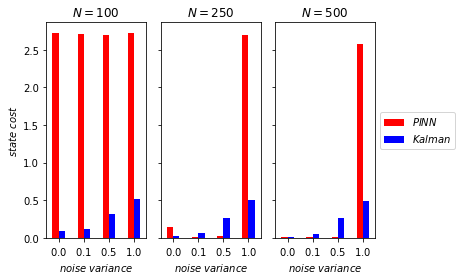

In [7]:
plot_comparison(get_subdf(pinn_df, 'state cost'), get_subdf(kalman_df, 'state_cost'), 
                ylabel=f"$state$ $cost$")

In [8]:
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (16, 8),
                     'text.usetex': True,
                     'text.latex.preamble': r'\usepackage{lmodern}', 
                     'font.weight': 'bold', 
                     "axes.labelweight": "bold"})

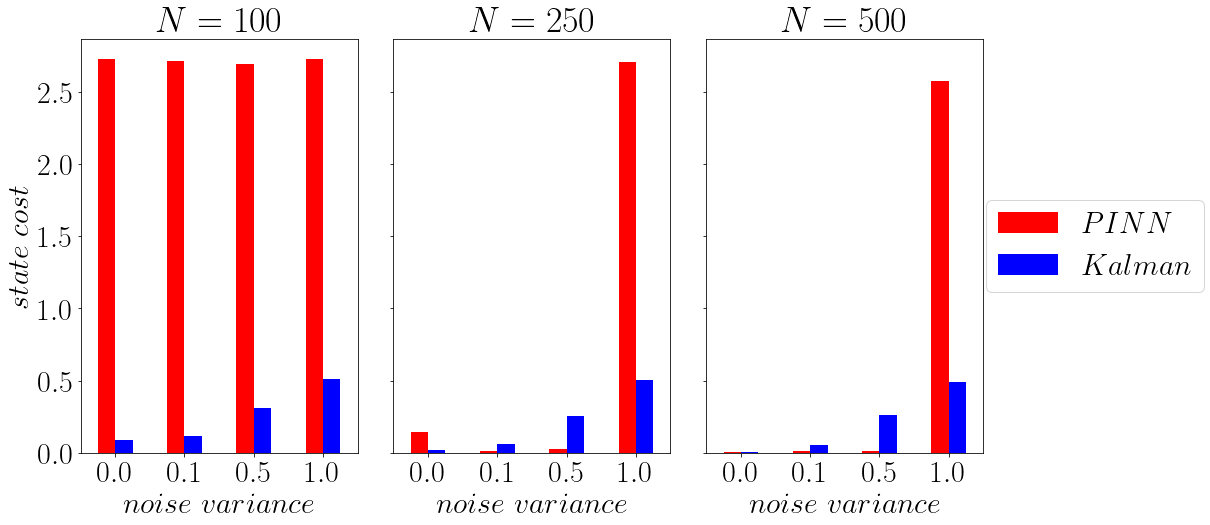

In [9]:
plot_comparison(get_subdf(pinn_df, 'state cost'), get_subdf(kalman_df, 'state_cost'), 
                ylabel=f"$state$ $cost$", 
                save_path=f"{base_dir}/comparison_state_cost.png")

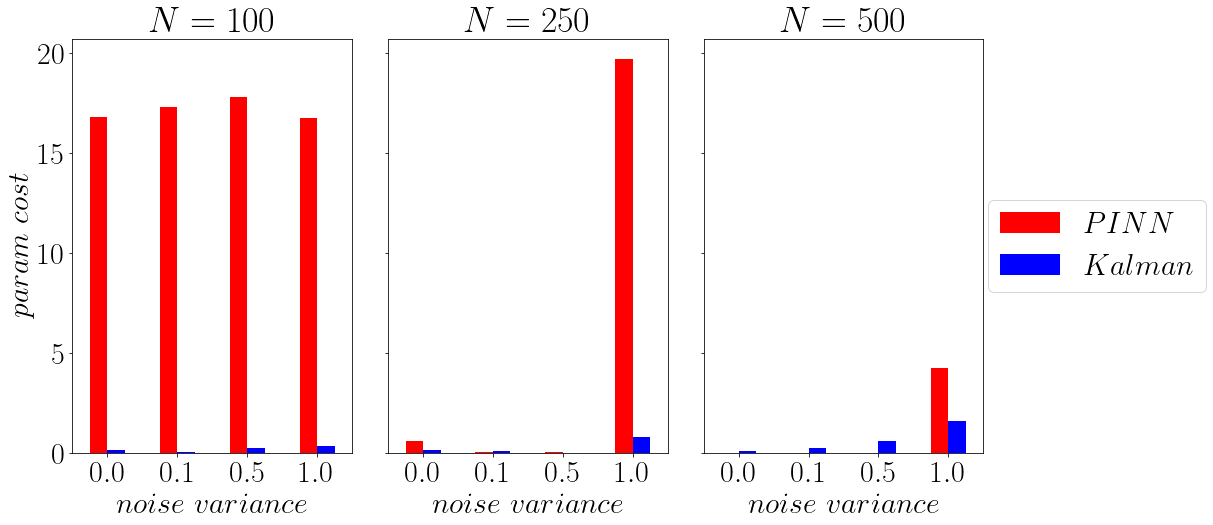

In [10]:
plot_comparison(get_subdf(pinn_df, 'param cost'), get_subdf(kalman_df, 'param_cost'), 
                ylabel=f"$param$ $cost$", 
                save_path=f"{base_dir}/comparison_param_cost.png")

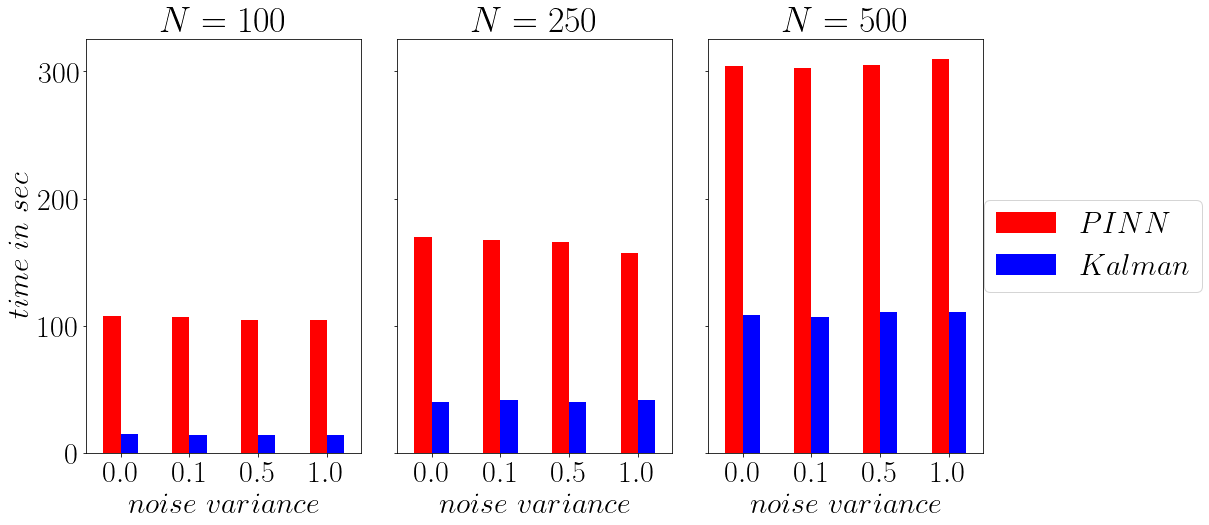

In [11]:
plot_comparison(get_subdf(pinn_df, 'time (in s)'), get_subdf(kalman_df, 'computation_time'), 
                ylabel=f"$time$ $in$ $sec$", 
                save_path=f"{base_dir}/comparison_time.png")

In [12]:
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (16, 24),
                     'text.usetex': True,
                     'text.latex.preamble': r'\usepackage{lmodern}', 
                     'font.weight': 'bold', 
                     "axes.labelweight": "bold"})

In [13]:
def plot_complete_comparison(pinn_df, kalman_df, save_path=None, anchor=1.27):
    fig, axs = plt.subplots(3,3, sharex=True, sharey='row')
    temp = {f"$state$ $cost$": ['state cost', 'state_cost'],
            f"$param$ $cost$": ['param cost', 'param_cost'],
            f"$time$ $in$ $sec$": ['time (in s)', 'computation_time'],}
    for i, label in enumerate(temp):
        pinn = get_subdf(pinn_df, temp[label][0])
        kalman = get_subdf(kalman_df, temp[label][1])
        for j, col in enumerate(pinn):
            temp_df = pandas.concat([pinn[col],kalman[col]], axis=1)
            temp_df.columns = ['$PINN$', '$Kalman$']
            temp_df.plot.bar(color=['r', 'b', 'g'], ax=axs[i,j], legend=False)
            axs[i,j].set_ylabel(label)
            axs[i,j].set_xlabel(r"$noise$ $variance$")
            if i == 0:
                axs[i,j].title.set_text(f"$N = {col}$")
                if j==1:
                    axs[i,j].legend(ncol=2, loc='upper center', bbox_to_anchor=(0.5, anchor))
            axs[i,j].tick_params(rotation=0)
    plt.subplots_adjust(hspace = .075, wspace=.075)
    #fig.tight_layout()
    if save_path is not None:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

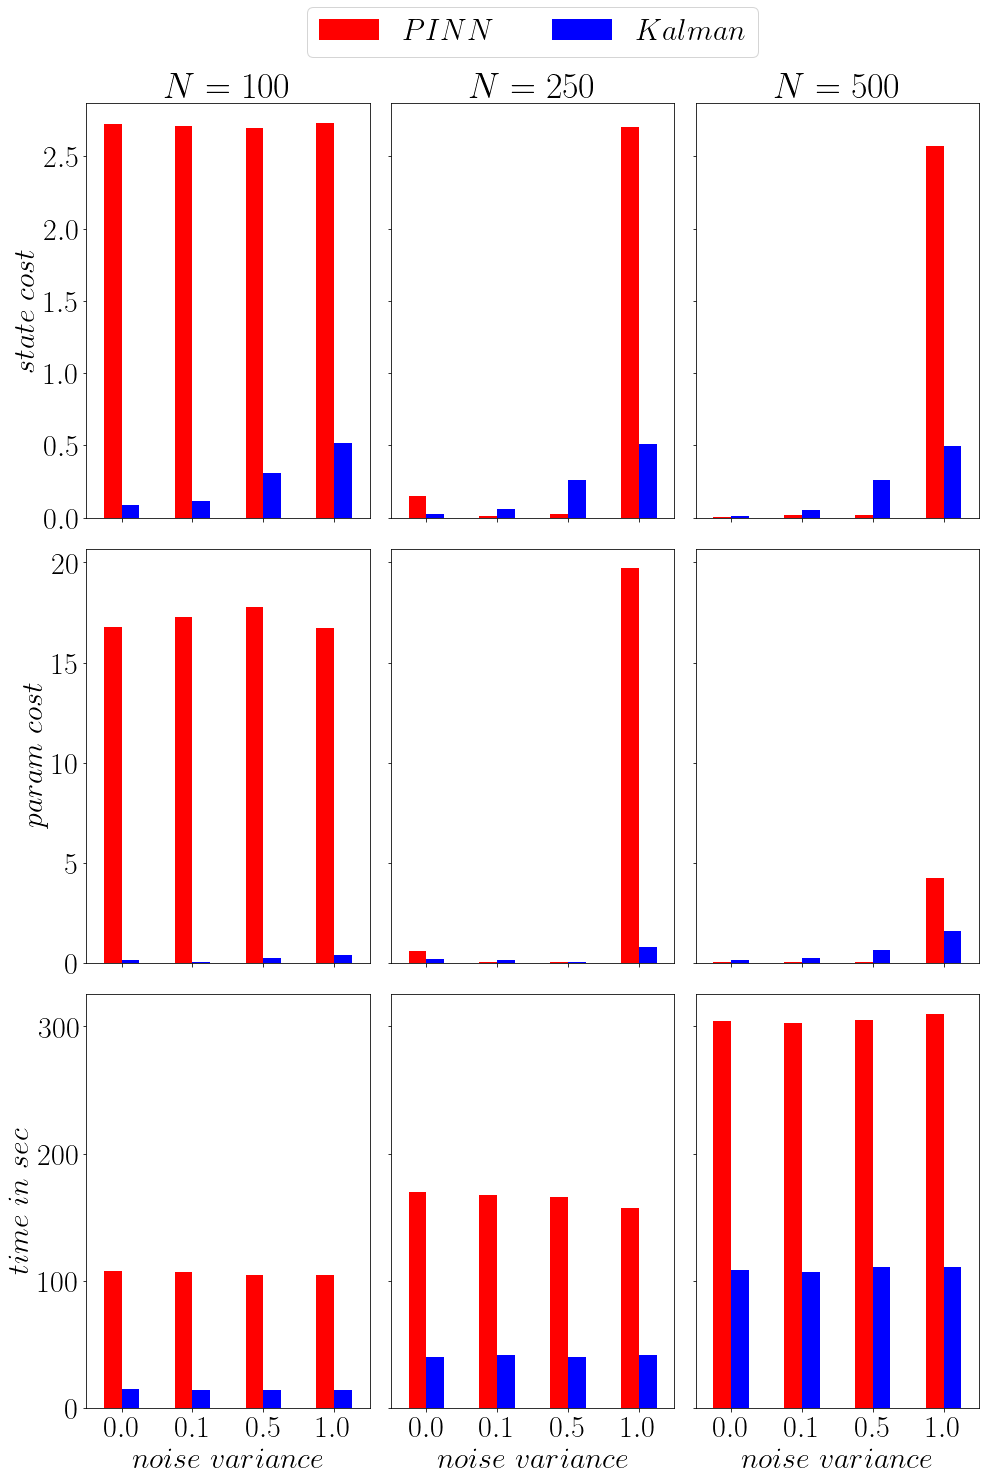

In [14]:
plot_complete_comparison(pinn_df, kalman_df, save_path=f"{base_dir}/comparison.png")

In [15]:
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (16, 16),
                     'text.usetex': True,
                     'text.latex.preamble': r'\usepackage{lmodern}', 
                     'font.weight': 'bold', 
                     "axes.labelweight": "bold"})

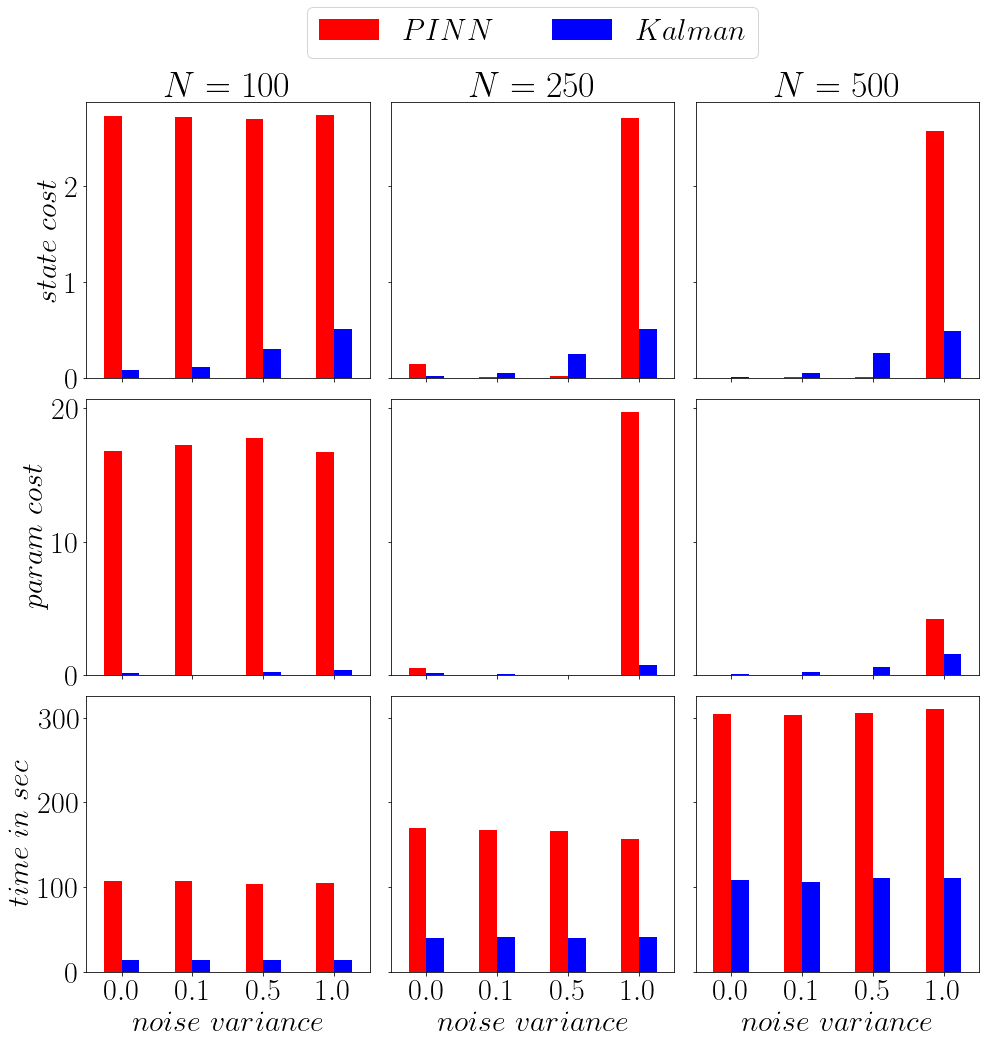

In [16]:
plot_complete_comparison(pinn_df, kalman_df, save_path=f"{base_dir}/comparison_small.png",  anchor=1.4)